In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("proshant.csv")

In [4]:
print(df.head())

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height_cm  weight_kg nationality            club_name  \
0        170         72   Argentina         FC Barcelona   
1       

In [5]:
df.drop(["ls","st","rb","rcb","cb","lcb","lb","rwb","rdm","cdm","ldm","lwb","rm","rcm","cm","rs","lcm","lm","ram","cam","lam","rw","rf","cf","lf","lw"],axis=1,inplace=True)

In [6]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11


In [8]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18944 non-null  int64  
 1   player_url                  18944 non-null  object 
 2   short_name                  18944 non-null  object 
 3   long_name                   18944 non-null  object 
 4   age                         18944 non-null  int64  
 5   dob                         18944 non-null  object 
 6   height_cm                   18944 non-null  int64  
 7   weight_kg                   18944 non-null  int64  
 8   nationality                 18944 non-null  object 
 9   club_name                   18719 non-null  object 
 10  league_name                 18719 non-null  object 
 11  league_rank                 18719 non-null  float64
 12  overall                     18944 non-null  int64  
 13  potential                   189

In [9]:
df["loyalty"] = 2020 - df["joined"].dt.year

df["body_type"] = df["body_type"].apply(lambda x: "not famous" if x.startswith("PLAYER_BODY_TYPE_") else "famous")

df["player_traits"] = df["player_traits"].apply(lambda x: len(x.split(",")) if type(x) == str else 0)

vf = df.groupby("club_name")[["value_eur_m"]].sum().sort_values(by="value_eur_m", ascending=False).head(500)
df["team_quality"] = df["club_name"].apply(lambda x: "high_quality" if x in vf.index else "low_quality")


In [10]:
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur_m                       0
wage_eur_m                        0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur_m            995
player_tags                   17536
team_position                     0
team_jersey_number          

In [21]:
num=df.select_dtypes(include=['float64','int64'])


for i in df.columns:
    if df[i].isnull().sum()>len(df)*0.90:
        df.drop(i,axis=1,inplace=True)

df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                       0
overall                           0
potential                         0
value_eur_m                       0
wage_eur_m                        0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur_m              0
team_position                     0
team_jersey_number                0
joined                      

In [22]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=15)
num=df.select_dtypes(include=['float64','int64'])
for i in num.columns:
   df[i]=knn.fit_transform(df[[i]])

df.isnull().sum()

sofifa_id                       0
player_url                      0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club_name                     225
league_name                   225
league_rank                     0
overall                         0
potential                       0
value_eur_m                     0
wage_eur_m                      0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
release_clause_eur_m            0
team_position                   0
team_jersey_number              0
joined                        983
contract_valid_until            0
nation_jersey_

In [23]:
df_encoded = df.copy()
def encode_column(df_encoded, column_name):
    if df_encoded[column_name].dtype == 'object':
        if df_encoded[column_name].nunique() <= 2:
            label_encoder = LabelEncoder()
            df_encoded[column_name] = label_encoder.fit_transform(df_encoded[column_name])
            return df_encoded
        elif 2 < df_encoded[column_name].nunique() <= 10:
            one_hot_encoder = OneHotEncoder()
            encoded_df = pd.DataFrame(one_hot_encoder.fit_transform(df_encoded[[column_name]]).toarray())
            encoded_df.columns = [column_name + "_" + str(i) for i in encoded_df.columns]
            df_encoded = df_encoded.join(encoded_df)
            df_encoded = df_encoded.drop(column_name, axis=1)
            return df_encoded
        else:
            return df_encoded
    else:
        return df_encoded
for column in df_encoded.columns:
    df_encoded = encode_column(df_encoded, column)


In [25]:
X = df_encoded.drop(["value_eur_m"], axis=1).values
y = df_encoded["value_eur_m"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_encoded[numeric_columns]

X = df_numeric.drop(["value_eur_m"], axis=1).values
y = df_numeric["value_eur_m"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Epoch 1/10
379/379 [==============================] - 2s 4ms/step - loss: 3.9036 - val_loss: 1.9442
Epoch 2/10
379/379 [==============================] - 2s 5ms/step - loss: 0.9647 - val_loss: 0.8104
Epoch 3/10
379/379 [==============================] - 1s 4ms/step - loss: 0.6734 - val_loss: 0.4317
Epoch 4/10
379/379 [==============================] - 1s 4ms/step - loss: 0.4498 - val_loss: 0.3696
Epoch 5/10
379/379 [==============================] - 1s 4ms/step - loss: 0.4782 - val_loss: 0.3225
Epoch 6/10
379/379 [==============================] - 1s 4ms/step - loss: 0.4349 - val_loss: 0.4001
Epoch 7/10
379/379 [==============================] - 1s 4ms/step - loss: 0.3649 - val_loss: 0.3180
Epoch 8/10
379/379 [==============================] - 1s 4ms/step - loss: 0.3458 - val_loss: 0.4269
Epoch 9/10
379/379 [==============================] - 1s 4ms/step - loss: 0.3008 - val_loss: 0.3919
Epoch 10/10
119/119 [==============================] - 0s 2ms/step
Mean Squared Error on Test Set: 0

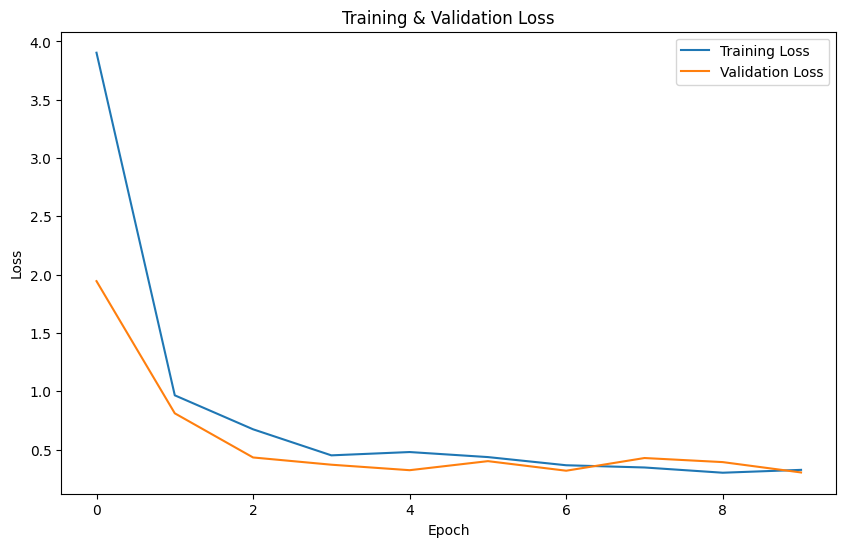

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
import pandas as pd
result_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(result_df.head())


   Actual  Predicted
0    0.30   0.317532
1    0.30   0.143153
2    0.08   0.084255
3    2.10   1.966953
4    0.35   0.451939


In [31]:
result_df['Residuals'] = result_df['Actual'] - result_df['Predicted']

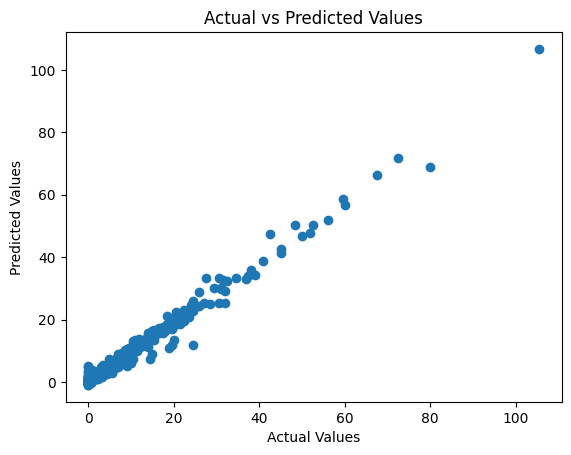

In [32]:
import matplotlib.pyplot as plt

plt.scatter(result_df['Actual'], result_df['Predicted'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(result_df['Actual'], result_df['Predicted'])
r_squared = r2_score(result_df['Actual'], result_df['Predicted'])

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r_squared}')

Mean Absolute Error: 0.2537835785043007
R-squared: 0.9853453016300603


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt

numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_encoded[numeric_columns]

X = df_numeric.drop(["value_eur_m"], axis=1).values
y = df_numeric["value_eur_m"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

y_pred = gr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.41842724059991704
Mean Absolute Error: 0.18012018102549726
R-squared: 0.9852079789068697


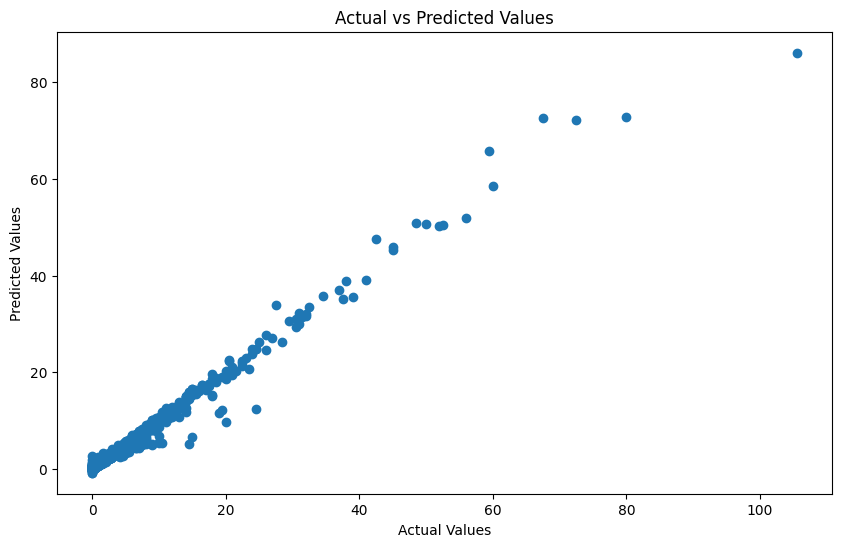

In [36]:
result_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
result_df['Residuals'] = result_df['Actual'] - result_df['Predicted']

plt.figure(figsize=(10, 6))
plt.scatter(result_df['Actual'], result_df['Predicted'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
